# <span style="Algerian:cursive;font-size:50px;color:Purple;">Loan Approval Prediction

***<span style="Algerian:cursive;font-size:25;color:Red;">About Company :***
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

***<span style="Algerian:cursive;font-size:25;color:Red;">Problem Statement :***
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
    
Dataset Link : https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction

# <span style="Algerian:cursive;font-size:25;color:Red;">Dataset Information 
1. ***Loan_ID :*** Unique Loan ID
2. ***Gender :*** Male/ Female
3. ***Married :*** Applicant married (Y/N)
4. ***Dependents :*** Number of dependents
5. ***Education :*** Applicant Education (Graduate/ Under Graduate)
6. ***Self_Employed :*** Self employed (Y/N)
7. ***ApplicantIncome :*** Applicant income
8. ***CoapplicantIncome :*** Coapplicant income
9. ***LoanAmount :*** Loan amount in thousands
10. ***LoanAmountTerm :*** Term of loan in months
11. ***Credit_History :*** credit history meets guidelines
12. ***Property_Area :*** Urban/ Semi Urban/ Rural
13. ***Loan_Status(Target) :*** Loan approved (Y/N)

# <span style="Algerian:cursive;font-size:25;color:Red;"> Objective
***To find a high performance predictive model that classifies the Loan Status.***

# <span style="Algerian:cursive;font-size:25px;color:red;">Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
l=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Loan_Status_Train_Data.csv")
l.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
l.shape

(614, 13)

In [4]:
l.size

7982

In [5]:
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
l.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
l.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
l.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# <span style="Algerian:cursive;font-size:25px;color:red;"> Data Visualisation

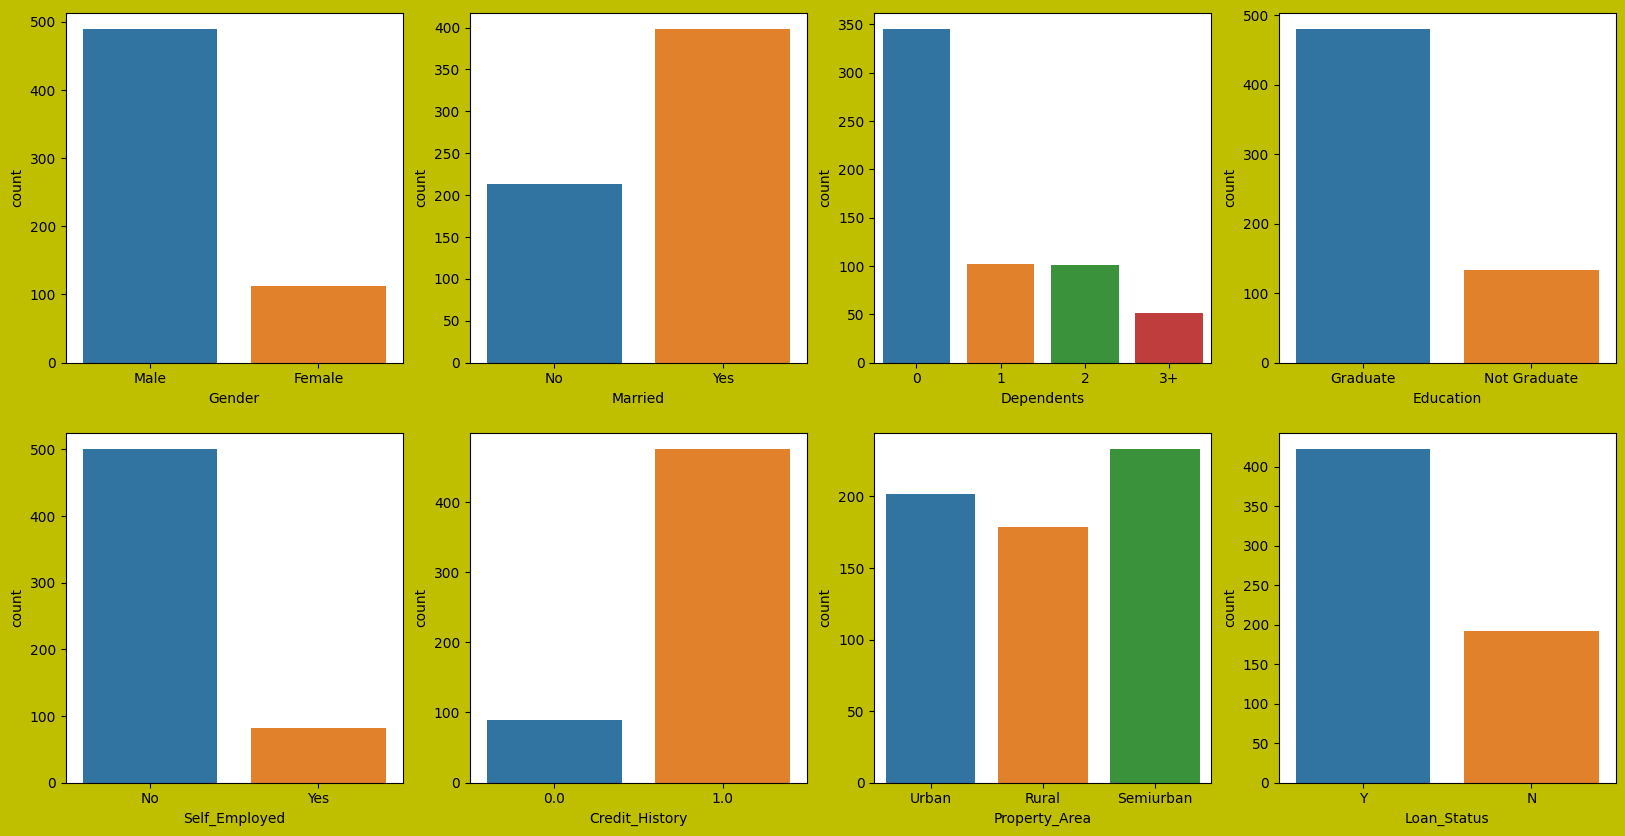

In [9]:
Col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']              
plt.figure(figsize=(20,10), facecolor='y')
for i, col in enumerate(Col):
    plt.subplot(2,4,i+1)
    sns.countplot(data=l, x=col)

***From bar graph we can see that,***
1. ***Applicant who is applied for the loan is mostly of male category as compared to female category.***
2. ***Most of the Married peoples are apply for the loan.***
3. ***Applicant who has 0 number of dependents they generally apply for the loan.***
4. ***Applicants who is graduated are mostly apply for the loan.***
5. ***Applicants who is not self Employed are mostly apply for the loan.***
6. ***Most of the applicants have credit history which meets the guidelines.***
7. ***Peoples from semiurban area are mostly apply for the loan.***
8. ***Applicants whose loan is approved has max count.***

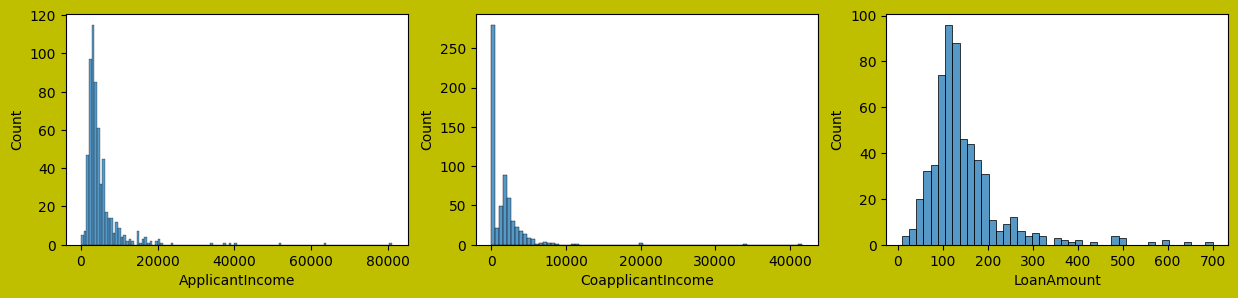

In [10]:
Num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'  ]
plt.figure(figsize=(15,3), facecolor='y')
for i, col in enumerate(Num_col):
    plt.subplot(1,3,i+1)
    sns.histplot(data=l, x=col)

***From above histogram we can see that ApplicantIncome,CoapplicantIncome and LoanAmount is of positively skewed.It means the mean of these variables is greater than their median as the data is more towards the right side.***

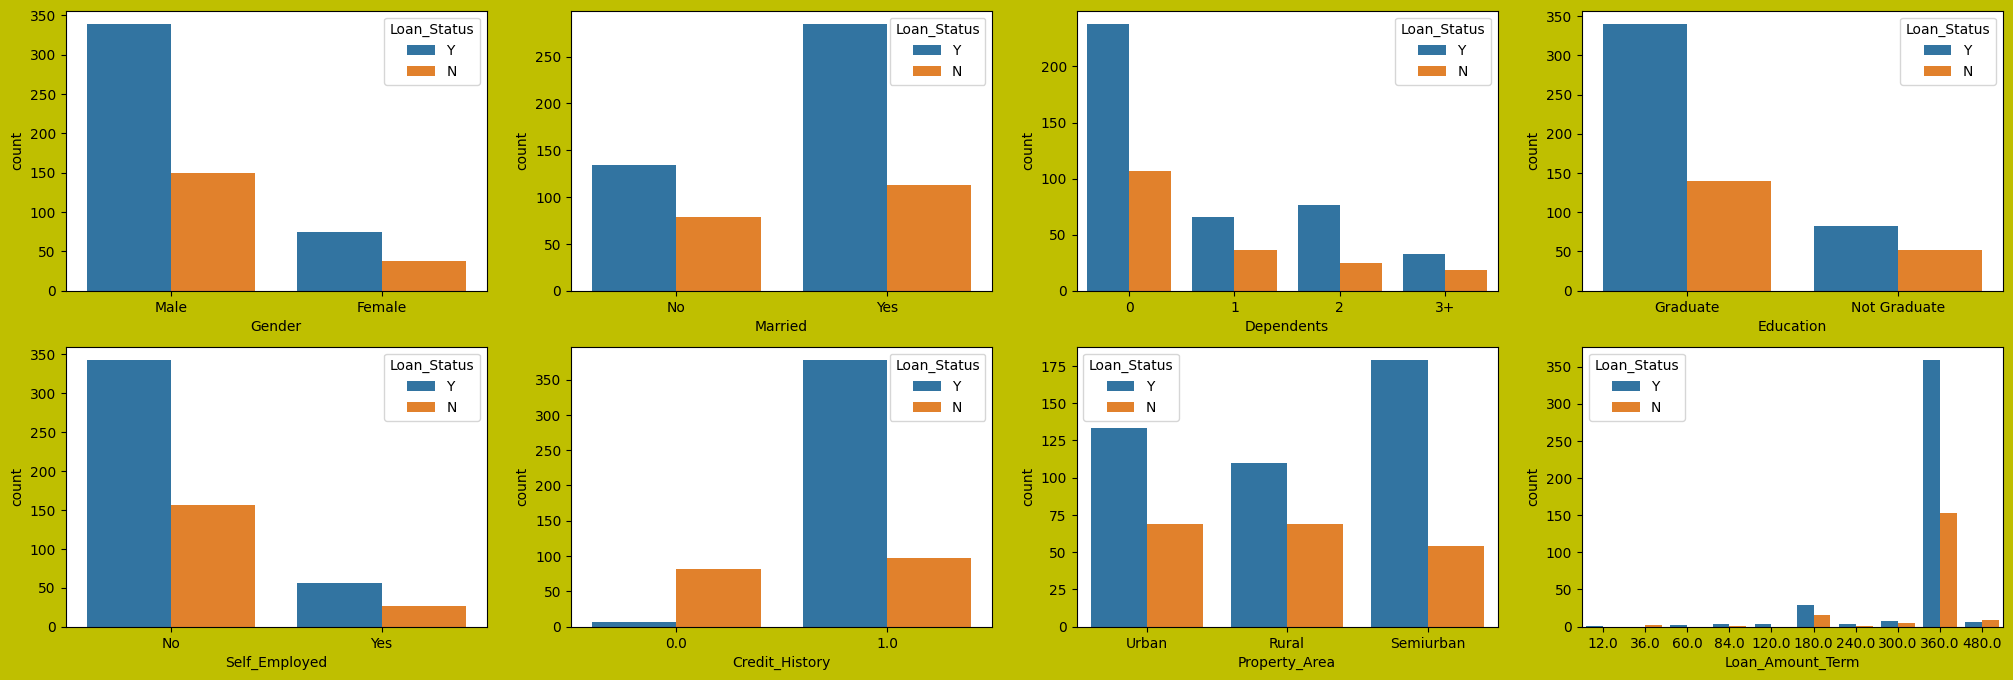

In [11]:
Cat_Col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Amount_Term']
plt.figure(figsize=(25,8),  facecolor='y')
for i, col in enumerate(Cat_Col):
    plt.subplot(2,4,i+1)  
    sns.countplot(data=l, x=col, hue='Loan_Status')

# <span style="Algerian:cursive;font-size:25px;color:red;">Data Preprocessing

***Steps involved in Data Preprocessing :***
1. Data cleaning
2. Identifying and removing outliers
3. Encoding categorical variables

In [12]:
# Finding Missing Values
l.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
print("LoanAmount : Mean =",l["LoanAmount"].mean(),"   Median =",l["LoanAmount"].median())

LoanAmount : Mean = 146.41216216216216    Median = 128.0


In [14]:
#Handling with Missing Values
l.Gender.fillna(l.Gender.mode()[0],inplace=True)
l.Dependents.fillna(l.Dependents.mode()[0],inplace=True)
l.Self_Employed.fillna(l.Self_Employed.mode()[0],inplace=True)
l.LoanAmount=l.LoanAmount.fillna(l.LoanAmount.median())
l.Loan_Amount_Term.fillna(l.Loan_Amount_Term.mode()[0],inplace=True)
l.Credit_History.fillna(l.Credit_History.mode()[0],inplace=True)
l.Loan_Status.fillna(l.Loan_Status.mode()[0],inplace=True)
l=l.dropna()
l.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Finding Dulicated Values
l.duplicated().sum()

0

In [16]:
#Merge ApplicantIncome and CoapplicantIncome columns with Income name and drop Loan_ID, ApplicantIncome, CoapplicantIncome columns
l["Income"]= l.ApplicantIncome + l.CoapplicantIncome  
l=l.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome"])
l.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0


<span style="Algerian:cursive;font-size:20px;color:Blue;"> Finding Outliers & Removing Outliers

LoanAmount             AxesSubplot(0.125,0.653529;0.133621x0.226471)
Loan_Amount_Term    AxesSubplot(0.285345,0.653529;0.133621x0.226471)
Credit_History       AxesSubplot(0.44569,0.653529;0.133621x0.226471)
Income              AxesSubplot(0.606034,0.653529;0.133621x0.226471)
dtype: object

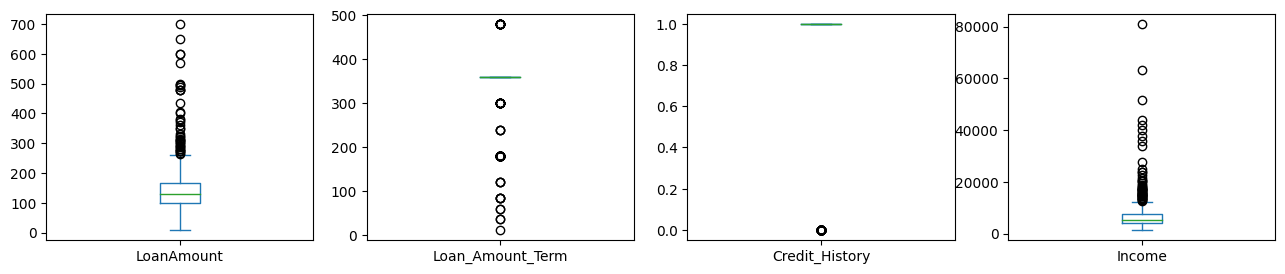

In [17]:
l.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(3,5), figsize=(20,10) )

LoanAmount             AxesSubplot(0.125,0.653529;0.133621x0.226471)
Loan_Amount_Term    AxesSubplot(0.285345,0.653529;0.133621x0.226471)
Credit_History       AxesSubplot(0.44569,0.653529;0.133621x0.226471)
Income              AxesSubplot(0.606034,0.653529;0.133621x0.226471)
dtype: object

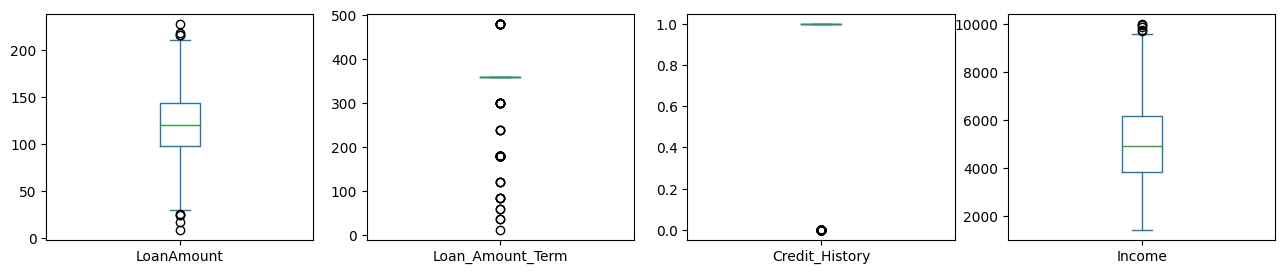

In [18]:
l=l[l.LoanAmount < 230]
l=l[l.Income < 10000]
l.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(3,5), figsize=(20,10) )

In [19]:
l.shape

(504, 11)

<span style="Algerian:cursive;font-size:20px;color:blue;">Data Encoding

In [20]:
#To create a list of character columns
lst=[]
for i in l.columns:
    if l[i].dtype == "O":
        lst.append(i)
    
for col in lst:
    print(col," --> Number of unique classes :",l[col].unique())

Gender  --> Number of unique classes : ['Male' 'Female']
Married  --> Number of unique classes : ['No' 'Yes']
Dependents  --> Number of unique classes : ['0' '1' '3+' '2']
Education  --> Number of unique classes : ['Graduate' 'Not Graduate']
Self_Employed  --> Number of unique classes : ['No' 'Yes']
Property_Area  --> Number of unique classes : ['Urban' 'Rural' 'Semiurban']
Loan_Status  --> Number of unique classes : ['Y' 'N']


In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in lst:
    l[i]=lb.fit_transform(l[i])

l.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0


In [22]:
print("Gender Unique :",l.Gender.unique())
print("Married Unique :",l.Married.unique())
print("Dependents Unique :",l.Dependents.unique())
print("Education Unique :",l.Education.unique())
print("Self_Employed Unique :",l.Self_Employed.unique())
print("Property_Area Unique :",l.Property_Area.unique())
print("Loan_Status Unique :",l.Loan_Status.unique())

Gender Unique : [1 0]
Married Unique : [0 1]
Dependents Unique : [0 1 3 2]
Education Unique : [0 1]
Self_Employed Unique : [0 1]
Property_Area Unique : [2 0 1]
Loan_Status Unique : [1 0]


<span style="Algerian:cursive;font-size:20px;color:blue;"> To Check Multicolliearity 

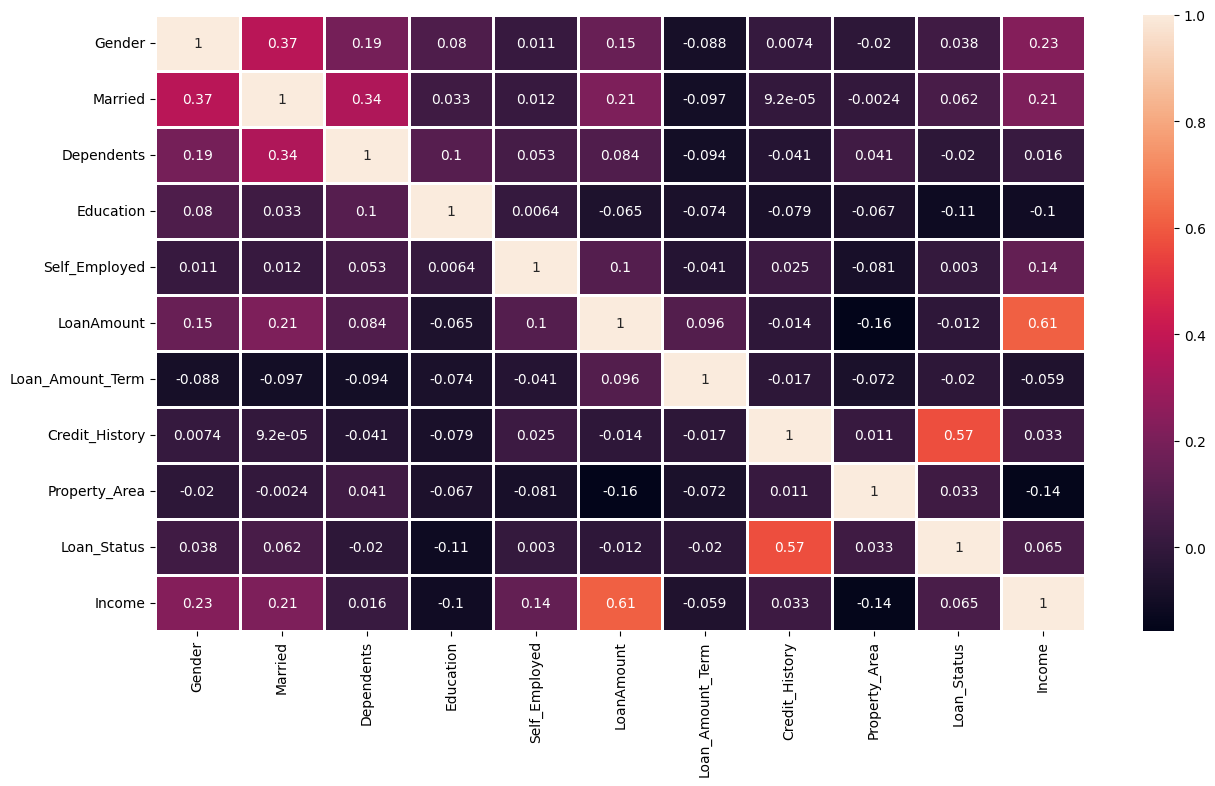

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(l.corr(),annot=True,linewidths=1)
plt.show()

***There is no any multicollinearity between independent variables.***

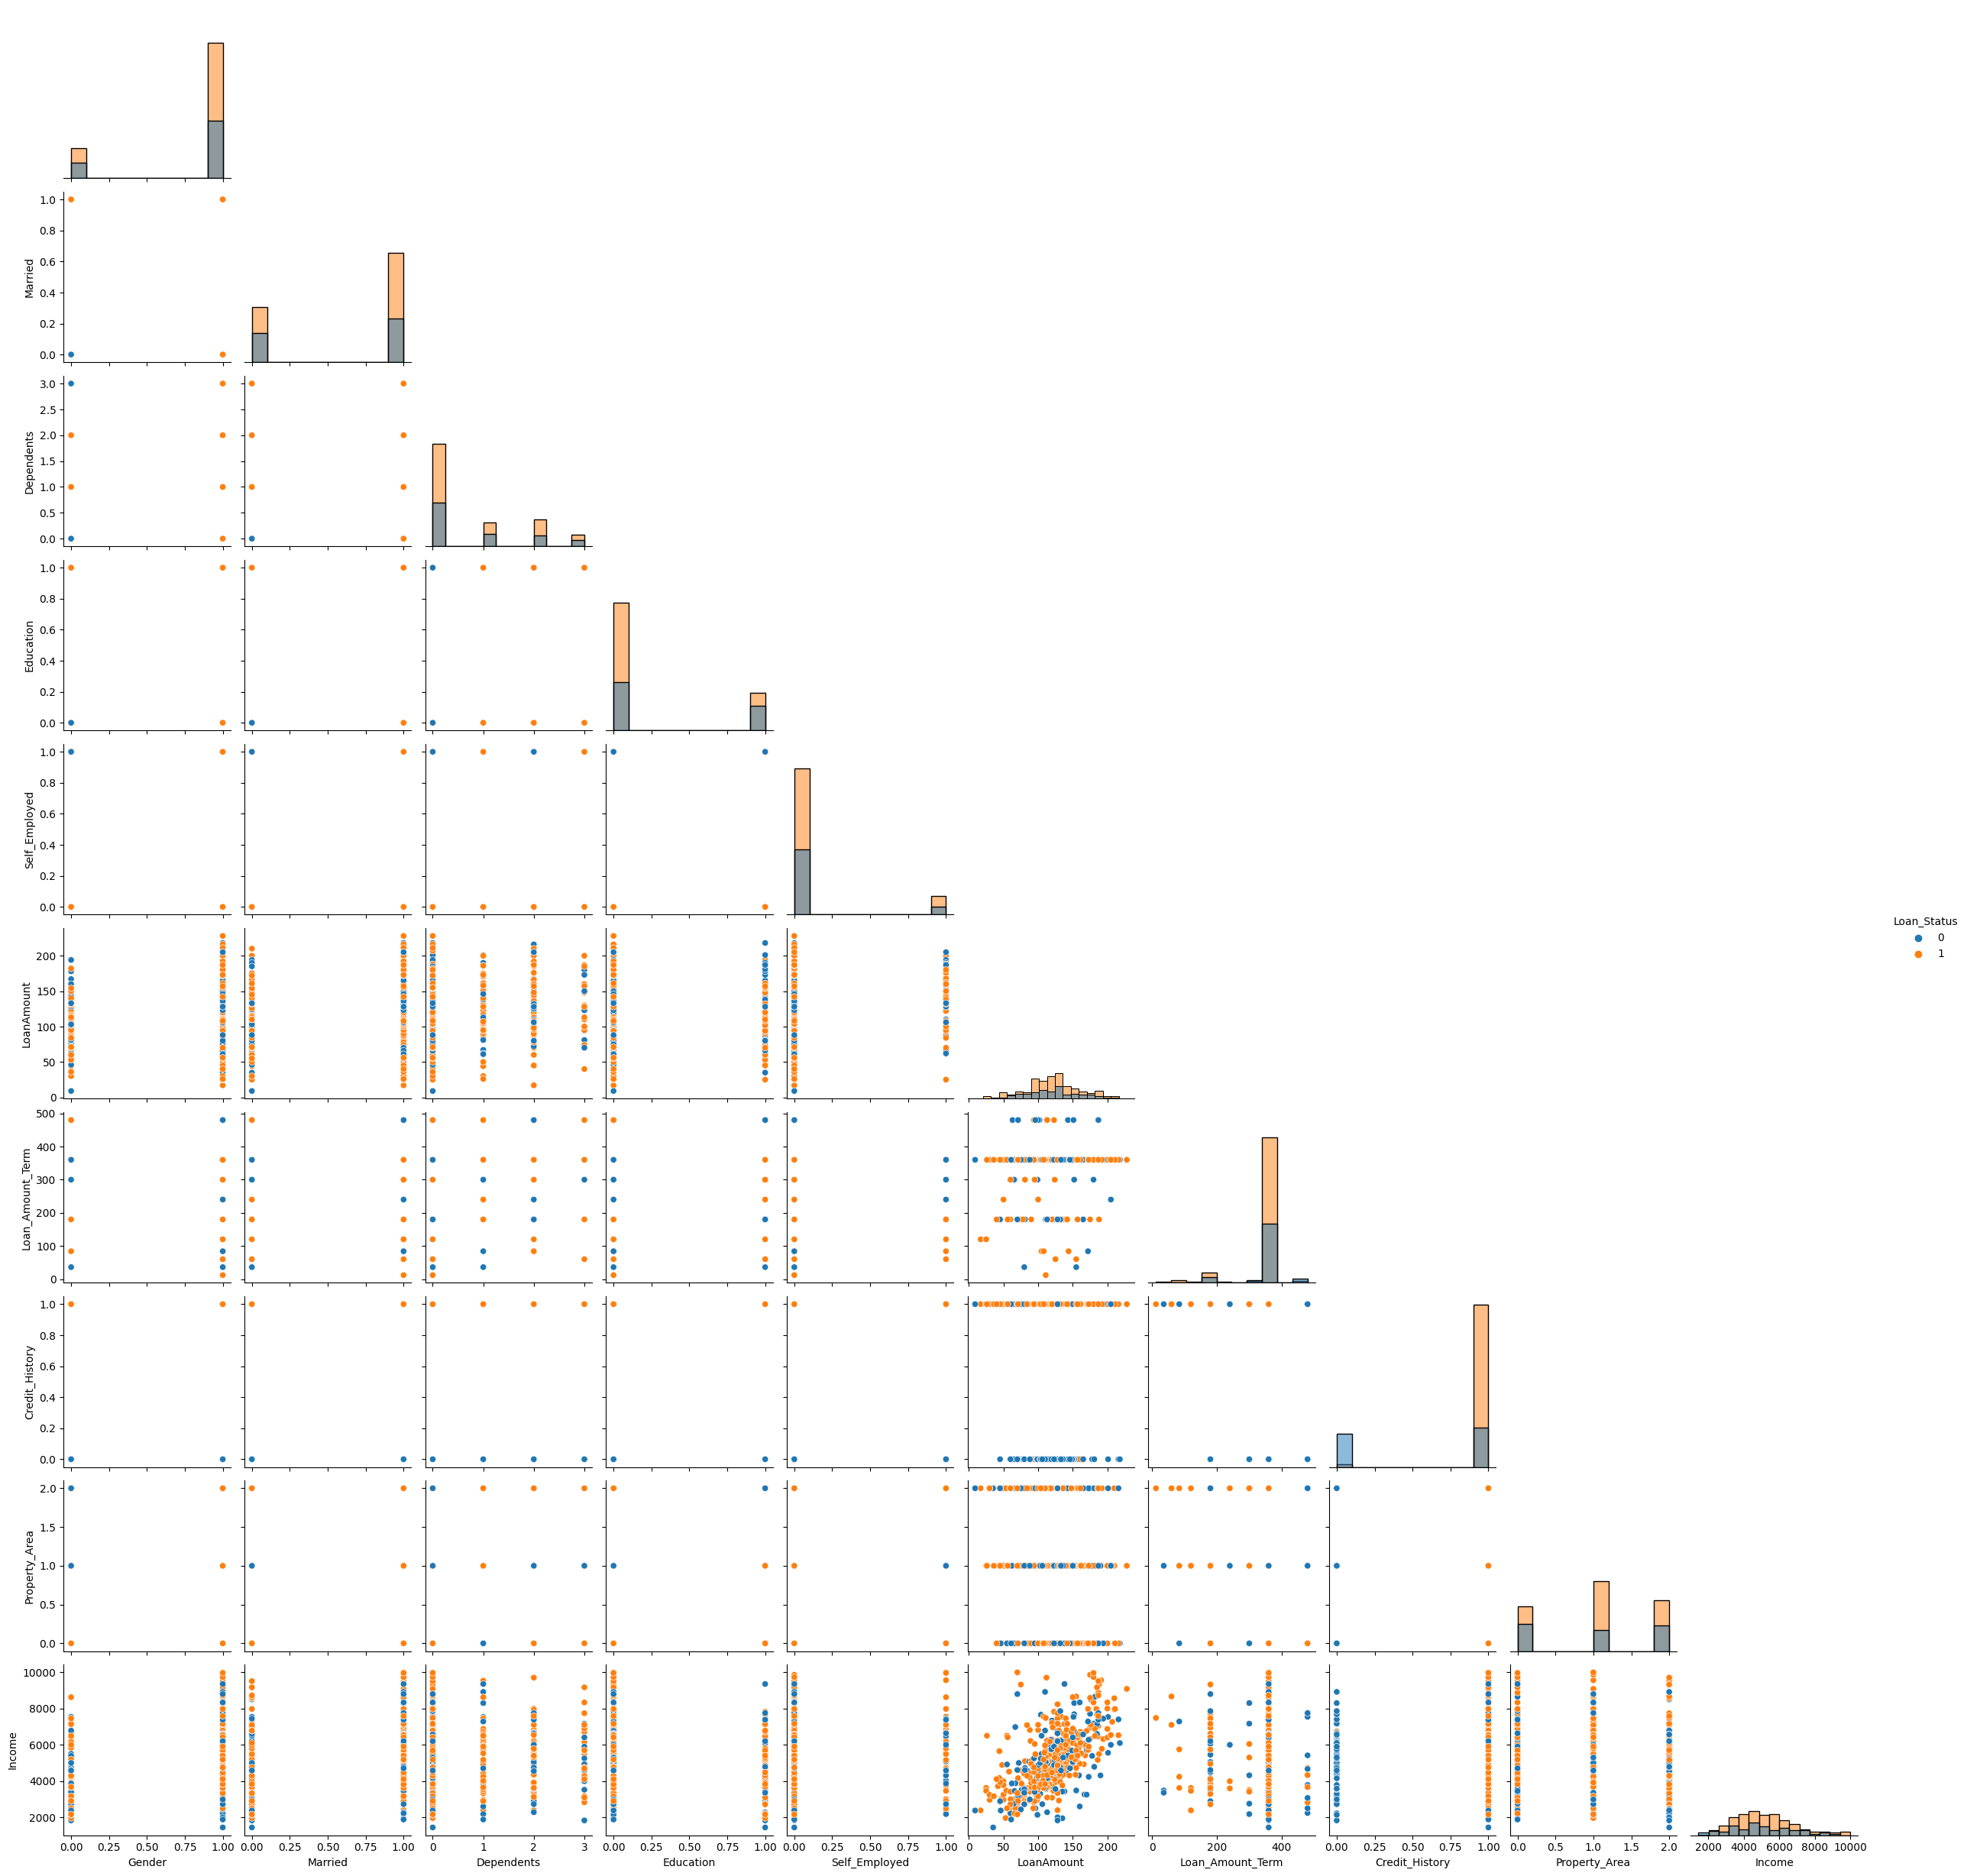

In [24]:
sns.pairplot(l, hue ='Loan_Status',diag_kind='hist',corner=True)

***From Graph we can observe that Income and Loan Amount are Possitively Correlated.***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Splittiing Dataset

In [25]:
x=l.drop(columns="Loan_Status")
y=l["Loan_Status"]                        # 1: Yes     0: No

In [26]:
from sklearn.model_selection import train_test_split

,index,Loan_Status
0,1,349
1,0,155


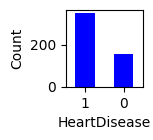

In [27]:
y.value_counts().plot(kind="bar", xlabel="HeartDisease", ylabel="Count", color="blue", rot=0, figsize=(1,1))
y.value_counts().reset_index()

***From above bar graph, we can observe that dataset is  unbalanced.***

#  <span style="Algerian:cursive;font-size:25px;color:red;">Balancing Dataset

***SMOTE :*** Synthetic Minority Oversampling Technique is a statistical technique for increasing the number of cases in the dataset in a balancing way.

In [28]:
from collections import Counter
from imblearn.combine import SMOTETomek 
smk=SMOTETomek(random_state=30)
x_smk, y_smk = smk.fit_resample(x,y)
print("Original Dataset Shape : ",Counter(y))
print("Resample Dataset Shape : ",Counter(y_smk))

Original Dataset Shape :  Counter({1: 349, 0: 155})
Resample Dataset Shape :  Counter({1: 306, 0: 306})


#  <span style="Algerian:cursive;font-size:25px;color:red;"> Model Building

<span style="Algerian:cursive;font-size:25px;color:purple;"> 1. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score

In [30]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

max_iteration=[]
for i in range(0,1000,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
print("Maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20, ", Accuracy Score :",accuracy)

Random State Number : 97 , Accuracy Score : 0.8699186991869918
Maximum iteration Number : 80 , Accuracy Score : 0.8699186991869918


In [31]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.2,random_state=97)

lr_model = LogisticRegression(max_iter=80)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
df=pd.DataFrame(y_pred_lr,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred_lr))

Table of Predicted and Actual values :
              0
Loan_Status   
0            1
1            1
0            0
0            0
1            1 

 ***********************************************************
Accuracy_score : 0.8699186991869918 

 ***********************************************************
Confusion_matrix : 
 [[54 13]
 [ 3 53]] 

 ***********************************************************
Precision_Score : 
 0.803030303030303 

 ***********************************************************
Recall_Score : 
 0.9464285714285714


<span style="Algerian:cursive;font-size:25px;color:purple;"> 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model_1 = DecisionTreeClassifier(max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(1,15):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=random_no)
    model=DecisionTreeClassifier(max_depth=k,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+1), ", Accuracy Score :",accuracy)

Random State Number : 31 , Accuracy Score : 0.8455284552845529
Maximum Depth : 3 , Accuracy Score : 0.8455284552845529


In [34]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.2,random_state=31)

dt_model = DecisionTreeClassifier(max_depth=3,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
1            1
1            1
0            1
1            1
1            1 

 ***********************************************************
Accuracy_score : 0.8455284552845529 

 ***********************************************************
Confusion_matrix : 
 [[39 15]
 [ 4 65]] 

 ***********************************************************
Precision_Score : 
 0.8125 

 ***********************************************************
Recall_Score : 
 0.9420289855072463


In [35]:
from sklearn import tree
from sklearn.tree import plot_tree

l["Loan_Status"].unique()     

array([1, 0])

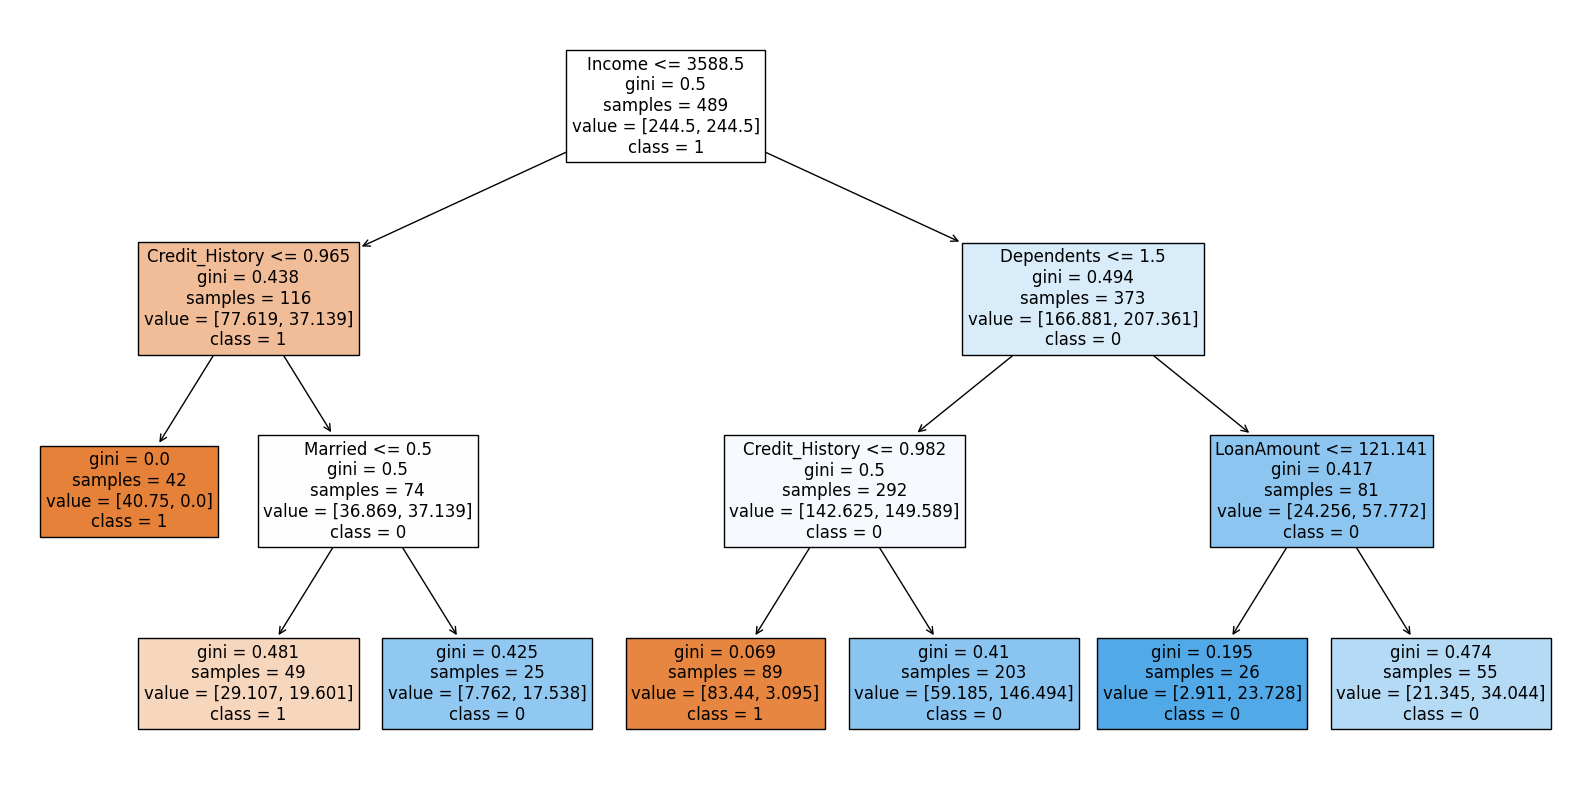

In [36]:
plt.figure(figsize=(20,10))
a=plot_tree(dt_model,fontsize=12,feature_names=x.columns,class_names=["1","0"],filled=True)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:purple;">3. Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 25 , Accuracy Score : 0.9024390243902439
Maximum Depth : 7 , Accuracy Score : 0.9024390243902439


In [39]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.2,random_state=25)
rf_model = RandomForestClassifier(max_depth=7,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
0            0
0            1
1            1
1            1
1            1 

 ***********************************************************
Accuracy_score : 0.9024390243902439 

 ***********************************************************
Confusion_matrix : 
 [[49 11]
 [ 1 62]] 

 ***********************************************************
Precision_Score : 
 0.8493150684931506 

 ***********************************************************
Recall_Score : 
 0.9841269841269841


<span style="Algerian:cursive;font-size:25px;color:purple;">4. KNN Algorithm

In [40]:
from sklearn.neighbors import KNeighborsClassifier

Random State Number : 83 , Accuracy Score : 0.7886178861788617
Maximum K_Neighbours : 5 , Accuracy Score : 0.7886178861788617


Text(0.5, 1.0, 'K Neighbours Classifier for different K values')

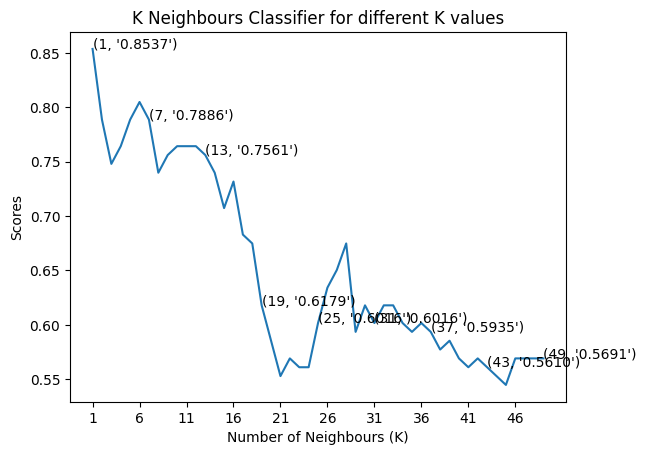

In [41]:
Random_State=[]
for j in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=j)
    knn=KNeighborsClassifier()
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

K_Neighbours=[]
for k in range(5,50,2):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=random_no)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    K_Neighbours.append(accuracy_score(y_test,y_pred))
    accuracy=max(K_Neighbours)
print("Maximum K_Neighbours :",(K_Neighbours.index(max(K_Neighbours))*2+5), ", Accuracy Score :",accuracy)

#Graph Code for KNN
knn_scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    y_prediction=knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test,y_prediction))

plt.plot([k for k in range(1,50)],knn_scores)
for i in range(1,50,6):
    plt.text(i,knn_scores[i-1],(i,'%.4f'%knn_scores[i-1]))
plt.xticks([i for i in range(1,50,5)])
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Scores')
plt.title("K Neighbours Classifier for different K values")

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=83)

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
0            0
1            1
1            1
0            0
0            0 

 ***********************************************************
Accuracy_score : 0.7886178861788617 

 ***********************************************************
Confusion_matrix : 
 [[58 10]
 [16 39]] 

 ***********************************************************
Precision_Score : 
 0.7959183673469388 

 ***********************************************************
Recall_Score : 
 0.7090909090909091


<span style="Algerian:cursive;font-size:25px;color:purple;"> 5. Naive Baye's Algorithm

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model=GaussianNB()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 97 , Accuracy Score : 0.8455284552845529


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=97)

nb_model=GaussianNB()
nb_model.fit(x_train , y_train)
y_pred = nb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
0            1
1            1
0            0
0            1
1            1 

 ***********************************************************
Accuracy_score : 0.8455284552845529 

 ***********************************************************
Confusion_matrix : 
 [[50 17]
 [ 2 54]] 

 ***********************************************************
Precision_Score : 
 0.7605633802816901 

 ***********************************************************
Recall_Score : 
 0.9642857142857143


<span style="Algerian:cursive;font-size:25px;color:purple;"> 6. Support Vector Machine

In [46]:
from sklearn.svm import SVC

In [47]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model=SVC()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 86 , Accuracy Score : 0.6422764227642277


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=86)

svm_model=SVC()
svm_model.fit(x_train , y_train)
y_pred = svm_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
1            1
1            1
1            1
1            1
0            1 

 ***********************************************************
Accuracy_score : 0.6422764227642277 

 ***********************************************************
Confusion_matrix : 
 [[23 35]
 [ 9 56]] 

 ***********************************************************
Precision_Score : 
 0.6153846153846154 

 ***********************************************************
Recall_Score : 
 0.8615384615384616


<span style="Algerian:cursive;font-size:25px;color:purple;"> 7. Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=i)
    model=GradientBoostingClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 45 , Accuracy Score : 0.9024390243902439


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.20, random_state=45)

gb_model=GradientBoostingClassifier()
gb_model.fit(x_train , y_train)
y_pred = gb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
              0
Loan_Status   
1            1
1            1
1            1
0            0
1            1 

 ***********************************************************
Accuracy_score : 0.9024390243902439 

 ***********************************************************
Confusion_matrix : 
 [[57  9]
 [ 3 54]] 

 ***********************************************************
Precision_Score : 
 0.8571428571428571 

 ***********************************************************
Recall_Score : 
 0.9473684210526315


# <span style="Algerian:cursive;font-size:25px;color:red;"> Conclusion

In [52]:
data={
    "Algorithms" : ["Logistic Regression", "Decision Tree", "Random Forest Classifier", "KNN Algorithm", "Naive Baye's", "SVM Algorithm", "Gradient Boosting" ],
    "Accuracy" : [0.8699186991869918 , 0.8455284552845529 , 0.9024390243902439   , 0.7886178861788617 , 0.8455284552845529 , 0.6422764227642277 , 0.9024390243902439 ],
    "Precision" : [0.803030303030303 , 0.8125   ,  0.8493150684931506   , 0.7959183673469388 , 0.7605633802816901 , 0.6153846153846154 , 0.8571428571428571 ],
    "Recall" : [0.9464285714285714 ,  0.9420289855072463 , 0.9841269841269841 ,  0.7090909090909091,  0.9642857142857143 , 0.8615384615384616, 0.9473684210526315 ]
}

df=pd.DataFrame(data)
df

,Algorithms,Accuracy,Precision,Recall
0,Logistic Regression,0.869919,0.803030,0.946429
1,Decision Tree,0.845528,0.812500,0.942029
2,Random Forest Classifier,0.902439,0.849315,0.984127
3,KNN Algorithm,0.788618,0.795918,0.709091
4,Naive Baye's,0.845528,0.760563,0.964286
5,SVM Algorithm,0.642276,0.615385,0.861538
6,Gradient Boosting,0.902439,0.857143,0.947368


Text(0.5, 1.0, 'Algorithms v/s Scores')

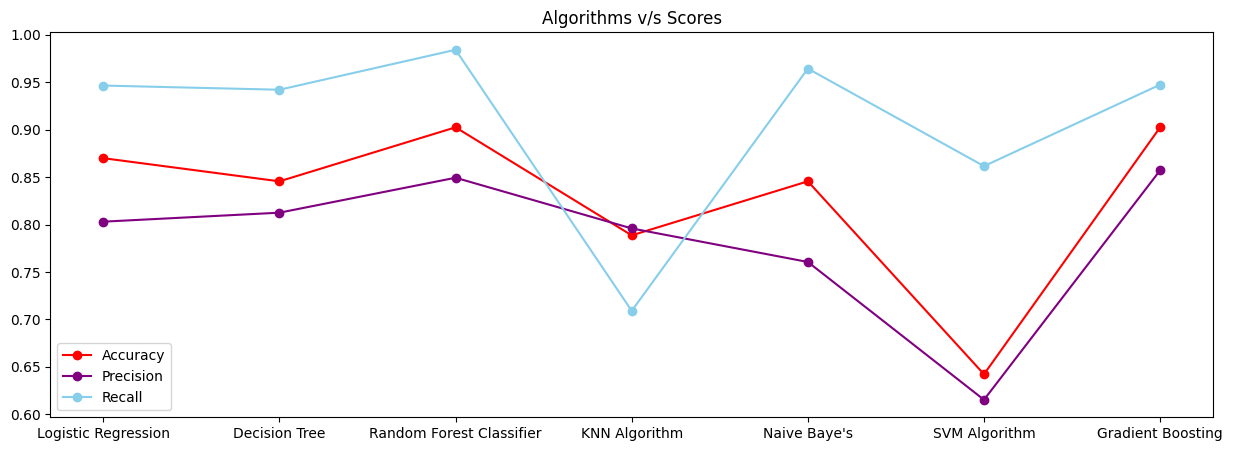

In [53]:
plt.figure(figsize=(15,5))
plt.plot(df["Algorithms"],df["Accuracy"],"red",label="Accuracy",marker="o")
plt.plot(df["Algorithms"],df["Precision"],"purple",label="Precision",marker="o")
plt.plot(df["Algorithms"],df["Recall"],"skyblue",label="Recall",marker="o")
plt.legend()
plt.title("Algorithms v/s Scores")

***So here we observe that random forest classifier gives highest accuracy, precision and recall as compare to other algorithms so we used random forest classifier algorithm for prediction result.***

# <span style="Algerian:cursive;font-size:25px;color:red;"> Importing Test Data

In [54]:
Loan=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Loan_Status_Test_Data.csv")
Loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [55]:
Loan.shape

(367, 12)

In [56]:
Loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
Loan.Gender.fillna(Loan.Gender.mode()[0],inplace=True)
Loan.Dependents.fillna(Loan.Dependents.mode()[0],inplace=True)
Loan.Self_Employed.fillna(Loan.Self_Employed.mode()[0],inplace=True)
Loan.LoanAmount=Loan.LoanAmount.fillna(Loan.LoanAmount.median())
Loan.Loan_Amount_Term.fillna(Loan.Loan_Amount_Term.mode()[0],inplace=True)
Loan.Credit_History.fillna(Loan.Credit_History.mode()[0],inplace=True)
Loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [58]:
Loan.duplicated().sum()

0

In [59]:
#Merge ApplicantIncome and CoapplicantIncome columns
Loan["Income"]= Loan.ApplicantIncome + Loan.CoapplicantIncome
Loan=Loan.drop(columns=["ApplicantIncome","CoapplicantIncome"])
Loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576


In [60]:
L=Loan.drop(columns="Loan_ID")

#To create a list of character columns
lst=[]
for i in L.columns:
    if L[i].dtype == "O":
        lst.append(i)
    
lst

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [61]:
for i in lst:
    L[i]=lb.fit_transform(L[i])

In [62]:
L.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,1,0,0,0,110.0,360.0,1.0,2,5720
1,1,1,1,0,0,126.0,360.0,1.0,2,4576


In [63]:
y_pred = rf_model.predict(L)

In [64]:
tab=pd.DataFrame()
tab["Loan_ID"]=Loan.Loan_ID
tab["Loan_Status_Pred_Values"]=y_pred
tab.replace({"Loan_Status_Pred_Values":{0:"N", 1:"Y"} },inplace=True)
tab.head()

,Loan_ID,Loan_Status_Pred_Values
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# <span style="Algerian:cursive;font-size:25px;color:red;">  Saving the dataframe

In [68]:
tab.to_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Loan_Pred_Values.csv")

# <span style="Algerian:cursive;font-size:25px;color:red;"> Importing Data Frame

In [69]:
loan=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Model_Saving\\Loan_Pred_Values.csv")

In [70]:
loan

,Unnamed: 0,Loan_ID,Loan_Status_Pred_Values
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
...,...,...,...
362,362,LP002971,Y
363,363,LP002975,Y
364,364,LP002980,Y
365,365,LP002986,Y


# <span style="Algerian:cursive;font-size:50px;color:black;">    ....................Thank You ....................